In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

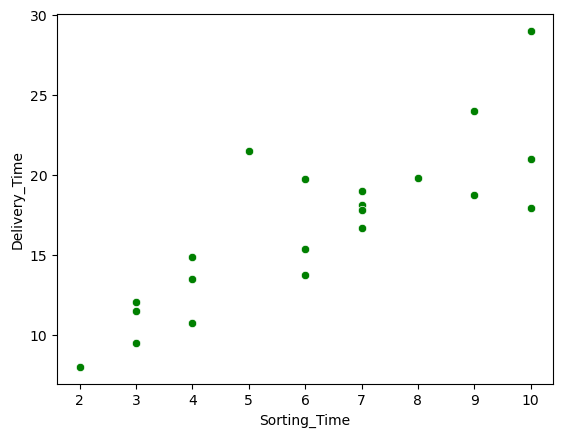

In [5]:
sns.scatterplot(x=df["Sorting_Time"], y=df["Delivery_Time"], color="green")

In [6]:
df.corr()    

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [11]:
X = df.drop('Delivery_Time', axis = 1)
y = df.Delivery_Time

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state = True )

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred_test = model.predict(X_test)

In [49]:
model.score(X_test,y_test)

0.881193344590806

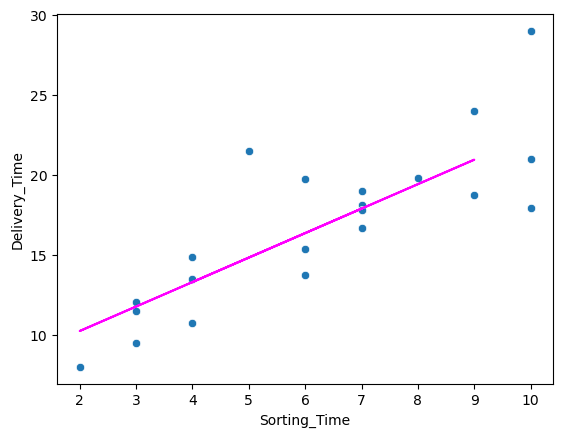

In [51]:
sns.scatterplot(x=df["Sorting_Time"],y=df["Delivery_Time"])
plt.plot(X_test,model.predict(X_test), color="magenta")
plt.show()

In [52]:
model.coef_  

array([1.52971053])

In [53]:
model.intercept_ 

7.176184210526316

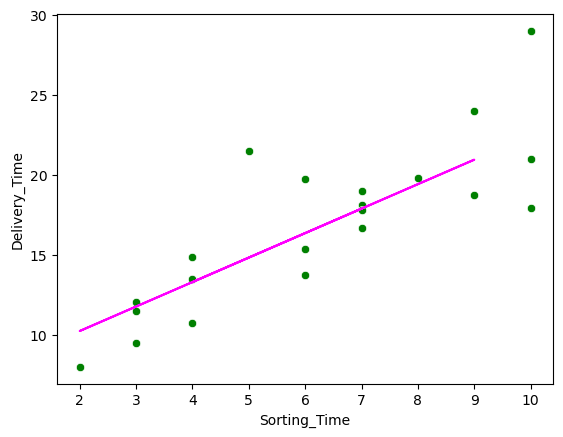

In [57]:
sns.scatterplot(x=df.Sorting_Time, y=df.Delivery_Time, color="Green")
plt.plot(X_test, model.predict(X_test), color="Magenta")
plt.show()

In [58]:
from statsmodels.formula.api import ols

In [59]:
linear_model =ols("y~X", data= df).fit()

In [60]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        17:42:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df1={"test_sorting_time":X_test.to_numpy()[0:,0], "Actual_Del_time":y_test.to_numpy(), "Predicted_del_time":y_pred_test}
df1=pd.DataFrame(df1)
df1

,test_sorting_time,Actual_Del_time,Predicted_del_time
0,4,14.88,13.295026
1,8,19.83,19.413868
2,9,24.00,20.943579
3,2,8.00,10.235605
4,7,18.11,17.884158


In [63]:
df1.to_csv("Predicted_response.csv")